In [ ]:
<h1>Simple</h1>

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

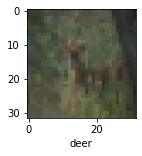

In [18]:
plot_sample(X_train, y_train, 10)

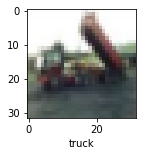

In [17]:
plot_sample(X_train, y_train, 2)

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 128s 81ms/step - loss: 1.8124 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.6211 - accuracy: 0.4287
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.5384 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.4783 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4312 - accuracy: 0.4952


<h3>
You can see that at the end of 5 epochs, accuracy is at around 49%</h3>

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5013 - accuracy: 0.4525
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.1512 - accuracy: 0.5937
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0157 - accuracy: 0.6475
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9349 - accuracy: 0.6768
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8699 - accuracy: 0.6970
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8170 - accuracy: 0.7183
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7740 - accuracy: 0.7311
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7392 - accuracy: 0.7447
Epoch 9/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7039 - accuracy: 0.7564
Epoch 10/10
1563/1563 [==============================] - 85s 55m

<h3>With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features</h3>

In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9008 - accuracy: 0.6942


[0.900762677192688, 0.6941999793052673]

In [27]:
y_pred = cnn.predict(X_test)

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [29]:
classes[y_classes[3]]

'airplane'